# ae_id
---

In [8]:
import pymysql
def get_conn():
    db = pymysql.connect(host="10.10.10.10",port=3306,
                   user="groupleader",password="onlyleaders",
                   db="acekg",charset="utf8")
    return db

conn = get_conn()
cur = conn.cursor()

- **all result** 

In [4]:
from tqdm.notebook import tqdm

sql = 'select ae_id, paper_id, question, res_entity from dde_Allpaper_abstract_QA_ner'
cur.execute(sql)
allresult = cur.fetchall()

In [5]:
ae_dict = {}
for res in tqdm(allresult):
    ae_dict[res[1:]] = res[0]

In [14]:
import ujson
with open('ae.json','w')as fin:
    ujson.dump(ae_dict,fin)

In [25]:
ae_dict[(490944503, 'aim', '2142004')]

15284357

- **top3 result**

In [6]:
from tqdm.notebook import tqdm
sql = 'select paper_id, question, res_entity from dde_paper_ner'
#sql ='select id, abs_score, title_score, qa_score, word_len, letter_len, complex_len from dde_paper_ner'
cur.execute(sql)
top3result = cur.fetchall()

In [37]:
top3_id_dict = {}
for i,tr in enumerate(tqdm(top3result),start=1):
    top3_id_dict[tr]=i

In [38]:
top3_id_dict

{(490944503, 'aim', '2142004'): 1,
 (490944503, 'aim', '2245788'): 2,
 (490944503, 'aim', '13398'): 3,
 (413129834, 'result_outperform', '2145107'): 4,
 (413129834, 'result_outperform', '77430'): 5,
 (413129834, 'result_outperform', '231064'): 6,
 (413129834, 'result', '2145107'): 7,
 (413129834, 'result', '77430'): 8,
 (413129834, 'result', '231064'): 9,
 (225103919, 'problem', '2196132'): 10,
 (225103919, 'problem', '2163671'): 11,
 (225103919, 'problem', '2276654'): 12,
 (225103919, 'result', '2313288'): 13,
 (225103919, 'result', '2093400'): 14,
 (225103919, 'result', '1507567'): 15,
 (10429838, 'aim', '2318502'): 16,
 (10429838, 'aim', '2270598'): 17,
 (10429838, 'aim', '2203629'): 18,
 (63781370, 'one_sentence_summary', '2168028'): 19,
 (63781370, 'one_sentence_summary', '2109376'): 20,
 (63781370, 'one_sentence_summary', '2234899'): 21,
 (63781370, 'method', '2168028'): 22,
 (63781370, 'method', '2109376'): 23,
 (63781370, 'method', '2254740'): 24,
 (63781370, 'experiment', '217

In [45]:
from tqdm.notebook import tqdm
for res in tqdm(top3result):
    try:
        sql = "update dde_paper_ner set ae_id={} where id={}".format(ae_dict[res],top3_id_dict[res])
        cur.execute(sql)
    except Exception as e:
        print(e) 
conn.commit()
cur.close()
conn.close()

(255399305, 'aim', '2094224')
(255399305, 'aim', '2232585')
(255399305, 'aim', '629717')
(255399305, 'result_outperform', '2162072')
(255399305, 'experiment', '2254740')
(255399305, 'experiment', '2122091')
(255399305, 'result', '2249628')
(255399305, 'result', '349778')
(255399305, 'result', '1655054')
(255399305, 'algorithm_dif', '2105447')
(255399305, 'algorithm_dif', '2205238')
(255399305, 'algorithm_dif', '2103582')
(255399305, 'algorithm_base', '2090496')
(255399305, 'algorithm_base', '2182329')
(255399305, 'algorithm', '2219174')
(255399305, 'algorithm', '2125380')
(255399305, 'algorithm', '2337059')
(5513392, 'one_sentence_summary', '2225796')
(5513392, 'one_sentence_summary', '2274933')
(5513392, 'one_sentence_summary', '2183628')
(5513392, 'problem', '2274933')
(5513392, 'problem', '2089868')
(5513392, 'problem', '2170211')
(5513392, 'performance_improvements', '2350534')
(5513392, 'performance_improvements', '2320379')
(5513392, 'performance_improvements', '14792')
(5513392,

In [44]:
(255399305, 'aim', '2094224') in ae_dict.keys()

False

- **unwork paper**

In [60]:
unwork_list = []
with open('unwork.txt','r') as fin:
    for line in fin:
        unwork_list.append(eval(line.split('\n')[0]))

In [65]:
unwork_id = tuple([top3_id_dict[item] for item in unwork_list])

(1336463,
 1336464,
 1336465,
 1336468,
 1336469,
 1336470,
 1336471,
 1336473,
 1336475,
 1336476,
 1336478,
 1336480,
 1336481,
 1336485,
 1336494,
 1336495,
 1336499,
 1356812,
 1356813,
 1356814,
 1356815,
 1356816,
 1356817,
 1356818,
 1356819,
 1356820,
 1356821,
 1356822,
 1356823,
 1356824,
 1356825,
 1356826,
 1356827,
 1356828,
 1356829,
 1358368,
 1358369,
 1358370,
 1358371,
 1358372,
 1358373,
 1358374,
 1358375,
 1358376,
 1358377,
 1358378,
 1358379,
 1358380,
 1358381,
 1358382,
 1358383,
 1359806,
 1359807,
 1359808,
 1359809,
 1359810,
 1359811,
 1359812,
 1359813,
 1359814,
 1359815,
 1359816,
 1359817,
 1359818,
 1359819,
 1359820,
 1361097,
 1361098,
 1361099,
 1361100,
 1361101,
 1361102,
 1361103,
 1361104,
 1361105,
 1361106,
 1361107,
 1361108,
 1361109,
 1361111,
 1361113,
 1361114,
 1361117,
 1361119,
 1361121,
 1361123,
 1371856,
 1371857,
 1371858,
 1371859,
 1371860,
 1371861,
 1371862,
 1371863,
 1371864,
 1371865,
 1371866,
 1371867,
 1371868,
 1371869,


In [72]:
from tqdm.notebook import tqdm
conn = get_conn()
cur = conn.cursor()
try:
    sql = "select * from dde_paper_ner where id in {}".format(unwork_id)
    cur.execute(sql)
    results = cur.fetchall()
except Exception as e:
    print(e) 

In [75]:
print(results[0])
len(results)

(1336463, 255399305, 'aim', 'minimizing the growing component of the forecast error', '2094224', 'Forecast error', '171', '185', 'In statistics, a forecast error is the difference between the actual or real and the predicted or forecast value of a time series or any other phenomenon of interest. Since the forecast error is derived from the same scale of data, comparisons between the forecast errors of different series can only be made when the series are on the same scale.In statistics, a forecast error is the difference between the actual or real and the predicted or forecast value of a time series or any other phenomenon of interest. Since the forecast error is derived from the same scale of data, comparisons between the forecast errors of different series can only be made when the series are on the same scale.In simple cases, a forecast is compared with an outcome at a single time-point and a summary of forecast errors is constructed over a collection of such time-points. Here the f

39755

In [76]:
for res in tqdm(results):
    try:
        sql = "insert into dde_Allpaper_abstract_QA_ner(paper_id,question,origin_res,res_entity,entity_name,entity_startPos,entity_endPos,entity_description,score,abs_score,title_score,qa_score,word_len,letter_len,complex_len) values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
        args = (res[1],res[2],res[3],res[4],res[5],res[6],res[7],res[8],res[9],res[10],res[11],res[12],res[13],res[14],res[15])
        cur.execute(sql,args)
    except Exception as e:
        print(e) 
conn.commit()
cur.close()
conn.close()

- **handel unwork paper**

In [81]:
unwork_dict = {}  #uid-->ae_id
max_ae_id = 26893261  #max 25043864  #unwork_id 插入dde_Allpaper_abstract_QA_ner第一行数据的ae_id
for uid in unwork_id:
    unwork_dict[uid] = max_ae_id
    max_ae_id += 1

In [82]:
unwork_dict

{1336463: 26893261,
 1336464: 26893262,
 1336465: 26893263,
 1336468: 26893264,
 1336469: 26893265,
 1336470: 26893266,
 1336471: 26893267,
 1336473: 26893268,
 1336475: 26893269,
 1336476: 26893270,
 1336478: 26893271,
 1336480: 26893272,
 1336481: 26893273,
 1336485: 26893274,
 1336494: 26893275,
 1336495: 26893276,
 1336499: 26893277,
 1356812: 26893278,
 1356813: 26893279,
 1356814: 26893280,
 1356815: 26893281,
 1356816: 26893282,
 1356817: 26893283,
 1356818: 26893284,
 1356819: 26893285,
 1356820: 26893286,
 1356821: 26893287,
 1356822: 26893288,
 1356823: 26893289,
 1356824: 26893290,
 1356825: 26893291,
 1356826: 26893292,
 1356827: 26893293,
 1356828: 26893294,
 1356829: 26893295,
 1358368: 26893296,
 1358369: 26893297,
 1358370: 26893298,
 1358371: 26893299,
 1358372: 26893300,
 1358373: 26893301,
 1358374: 26893302,
 1358375: 26893303,
 1358376: 26893304,
 1358377: 26893305,
 1358378: 26893306,
 1358379: 26893307,
 1358380: 26893308,
 1358381: 26893309,
 1358382: 26893310,


In [83]:
from tqdm.notebook import tqdm
conn = get_conn()
cur = conn.cursor()
for key in tqdm(list(unwork_dict.keys())):
    try:
        sql = "update dde_paper_ner set ae_id={} where id={}".format(unwork_dict[key],key)
        cur.execute(sql)
    except Exception as e:
        print(e) 
conn.commit()
cur.close()
conn.close()

---
---
- **dde_paper_abstract_QA_ner**

In [3]:
from tqdm.notebook import tqdm
sql = 'select dpaqn_id, paper_id, question, res_entity from dde_paper_abstract_QA_ner'
#sql ='select id, abs_score, title_score, qa_score, word_len, letter_len, complex_len from dde_paper_ner'
cur.execute(sql)
carbon_results = cur.fetchall()

In [25]:
carbon_dict = {}
for res in tqdm(carbon_results):
    carbon_dict[str(res[1:])] = res[0]

In [26]:
carbon_dict

{"(29187443, 'aim', '2076165')": 16686,
 "(29187443, 'aim', '1452904')": 16687,
 "(29187443, 'aim', '2083626')": 16688,
 "(29187443, 'aim', '2142136')": 16689,
 "(29187443, 'aim', '555668')": 16690,
 "(29187443, 'problem', '2106750')": 16691,
 "(29187443, 'problem', '2278238')": 16692,
 "(29187443, 'problem', '2280764')": 16693,
 "(29187443, 'problem', '2289006')": 16694,
 "(29187443, 'problem', '491248')": 16695,
 "(29187443, 'problem', '692189')": 16696,
 "(29187443, 'problem', '2142136')": 16697,
 "(29187443, 'problem', '555668')": 16698,
 "(29187443, 'method', '2332352')": 16699,
 "(29187443, 'method', '1145400')": 16700,
 "(29187443, 'method', '415660')": 16701,
 "(29187443, 'methor_base', '2318153')": 16702,
 "(29187443, 'methor_base', '2184578')": 16703,
 "(29187443, 'methor_base', '1447')": 16704,
 "(29187443, 'methor_base', '2278238')": 16705,
 "(29187443, 'methor_base', '2212317')": 16706,
 "(29187443, 'methor_base', '1262119')": 16707,
 "(29187443, 'methor_base', '2213444')"

In [28]:
import ujson
with open('ae.json','r')as f:
    ae_dcit = ujson.load(f)

In [49]:
from tqdm.notebook import tqdm
i = 0
for res in tqdm(carbon_results):
    try:
        sql = "update dde_paper_abstract_QA_ner set ae_id={} where dpaqn_id={}".format(ae_dict[str(res[1:])],carbon_dict[str(res[1:])])
        cur.execute(sql)
    except Exception as e:
        print(e)
        i += 1
        print(str(e),file=f)
conn.commit()
cur.close()
conn.close()

"(99929928, 'aim', '2225708')"
"(99929928, 'aim', '2318153')"
"(99929928, 'aim', '1447')"
"(99929928, 'aim', '2213444')"
"(99929928, 'aim', '2131015')"
"(99929928, 'aim', '12226')"
"(99929928, 'aim', '2244912')"
"(99929928, 'aim', '275256')"
"(99929928, 'aim', '2212268')"
"(99929928, 'aim', '2282161')"
"(99929928, 'aim', '2352437')"
"(99929928, 'aim', '618457')"
"(99929928, 'method', '2147949')"
"(99929928, 'method', '2346305')"
"(99929928, 'method', '2359145')"
"(99929928, 'method', '2098444')"
"(99929928, 'methor_base', '1858375')"
"(99929928, 'methor_base', '2285014')"
"(99929928, 'result_outperform', '2273515')"
"(99929928, 'result_outperform', '2115695')"
"(99929928, 'result_outperform', '2175055')"
"(99929928, 'result_outperform', '2342091')"
"(99929928, 'result_outperform', '14679')"
"(99929928, 'experiment', '2160274')"
"(99929928, 'experiment', '2147949')"
"(99929928, 'experiment', '2346305')"
"(99929928, 'experiment', '2359145')"
"(99929928, 'experiment', '2098444')"
"(999299

In [55]:
99929928 in a 

False

# normalize
---

# -- **evaluate**

In [5]:
f_benchmark_paper_id = open('data/benchmark_paper.txt', 'r', encoding='utf8')
f_benchmark_res_top3 = open('data/benchmark_result.txt', 'r', encoding='utf8')

bm_paper = []
for line in f_benchmark_paper_id:
    bm_paper.append(int(line[:-1]))

bm_answer = []
for line in f_benchmark_res_top3:
    bm_answer.append(int(line[:-1]))

In [6]:
bm_paper[:2], bm_answer[:2]

([420342715, 87250949], [21042067, 21042097])

In [11]:
from tqdm.notebook import tqdm
bm_paper = tuple(bm_paper)
conn = get_conn()
cur = conn.cursor()
sql = 'select ae_id from dde_paper_ner where paper_id in {}'.format(bm_paper)
cur.execute(sql)
result  = cur.fetchall()
pre_result = []
for res in tqdm(result):
    pre_result.append(res[0])

In [14]:
def factor(pred_data,true_data):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for key in pred_data:
        if key in true_data:
            tp += 1
        else:
            fp += 1
    for key in true_data:
        if key not in pred_data:
            fn += 1
        else:
            tn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * precision * recall / (precision + recall)
    return precision, recall, f1_score

In [15]:
factor(pre_result,bm_answer)

(0.544766708701135, 0.6, 0.5710508922670192)

# -- **l2r evaluate top3**

In [16]:
import ujson
with open('ndcg_record.json','r')as f:
    ndcg_record = ujson.load(f)

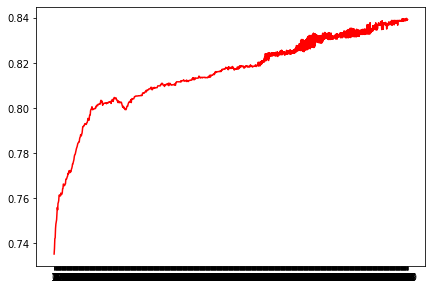

In [18]:
from matplotlib import pyplot as plt
import numpy as np
def plot(ndcg_record):
    x = np.array(list(ndcg_record.keys()))
    y = np.array(list(ndcg_record.values()))
    fig = plt.figure()
    axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
    axes.plot(x, y, 'r')
    plt.show()
plot(ndcg_record)

test evaluate:  (0.46153846153846156, 0.5959367945823928, 0.5201970443349754)

benchmark evaluate:  (0.5498108448928121, 0.6175637393767706, 0.5817211474316211)
